In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read PF data
num_data = 10000

num_branches = 186

nt = 12

file_path = f'../../Documents/GitHub/GNN_SCUC/data/IEEE_Case118/outputs/PF/sample_{1}.csv'
all_PF = pd.read_csv(file_path, header=None, index_col=None)

for i in range(1, num_data):
    file_path = f'../../Documents/GitHub/GNN_SCUC/data/IEEE_Case118/outputs/PF/sample_{i+1}.csv'
    try:
        PF = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    except FileNotFoundError:
        print(f'File sample_{i+1}.csv is not found.')
        continue
    all_PF = np.concatenate([all_PF, PF], axis=1)

File sample_4363.csv is not found.
File sample_7077.csv is not found.


In [3]:
# Get min, median, and max of PF
PF_min = np.abs(all_PF).min(axis=1)
PF_median = np.median(np.abs(all_PF), axis=1)
PF_max = np.abs(all_PF).max(axis=1)

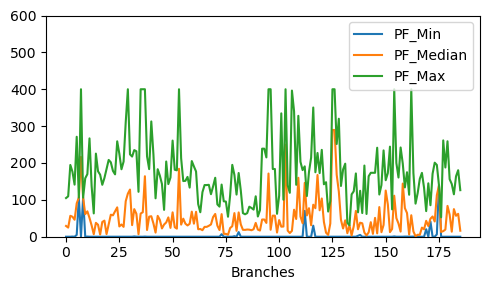

In [5]:
# Plot min, median and max of PF
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.plot(PF_min, label='PF_Min')
ax.plot(PF_median, label='PF_Median')
ax.plot(PF_max, label='PF_Max')
ax.set_ylim((0, 600))
ax.set_xlabel('Branches')
ax.legend()

fig.savefig('PF_min_median_max.jpg')

plt.tight_layout()
plt.show()
plt.close('all')

In [24]:
# Select three categories of PF_Max
bidx1 = PF_max <= 150
bidx2 = (PF_max > 150) & (PF_max <= 250)
bidx3 = PF_max > 250

In [25]:
bidx1.shape, bidx2.shape, bidx3.shape

((186,), (186,), (186,))

In [26]:
bidx1.sum(), bidx2.sum(), bidx3.sum()

(76, 82, 28)

In [28]:
pd.DataFrame(bidx1.astype(float)).to_csv('PF_max_category1.csv', header=None, index=None, columns=None)
pd.DataFrame(bidx2.astype(float)).to_csv('PF_max_category2.csv', header=None, index=None, columns=None)
pd.DataFrame(bidx3.astype(float)).to_csv('PF_max_category3.csv', header=None, index=None, columns=None)